In [1]:
from fxns.fill_ps import *
from fxns.sad_sampler import *

import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import default_rng

In [2]:
s= 5
n= 50
nsamples = 50000

samples = sample_fs(s, n, nsamples)

samples_tally = tally_sets(samples)

## Set frequency

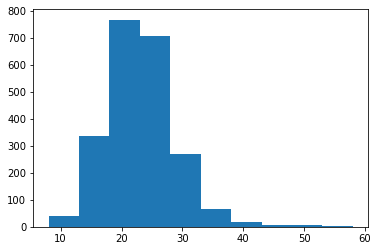

In [3]:
fig, ax = plt.subplots()

ax.hist(samples_tally["frequency"])

plt.show()


In [4]:
unique_samples = samples_tally.shape[0]
unique_samples

2211

In [5]:
nsamples/unique_samples

22.61420171867933

### Compare distribution of set frequency to draws from a uniform distribution

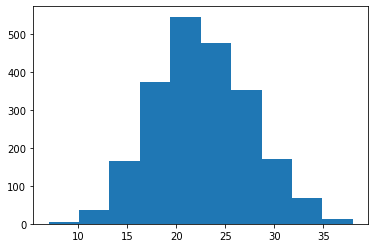

In [6]:
rng = default_rng()
vals = rng.integers(unique_samples, size = nsamples)

v, freq = np.unique(vals, return_counts = True, axis  = 0)

uniform_df = pd.DataFrame(v)

uniform_df["frequency"] = freq

fig, ax = plt.subplots()

ax.hist(uniform_df["frequency"])

plt.show()


## Plotted RADs

In [7]:
samples_long = samples_tally.drop(columns = ['frequency'])
samples_long["sample"] = range(samples_long.shape[0])
samples_long = samples_long.melt(id_vars = 'sample', var_name = 'rank', value_name = 'abundance')
samples_long

,sample,rank,abundance
0,0,0,1
1,1,0,1
2,2,0,1
3,3,0,1
4,4,0,1
...,...,...,...
11050,2206,4,14
11051,2207,4,13
11052,2208,4,13
11053,2209,4,14


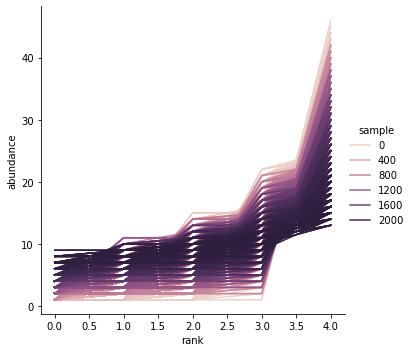

In [8]:
import seaborn as sns
g = sns.relplot(x="rank", y="abundance", hue = "sample", kind="line", data=samples_long)
g